<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Homework%20MergeApply/Homework6_MergeApply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Συνδυάζοντας πολλά Dataframes με τη χρήση κλειδιών

Χρησιμοποιούμε ένα  σύνολο δεδομένων για τα επιδόματα ανεργίας και τους μισθούς στην Ευρώπη.

## Data from https://data.oecd.org/

## Ας κάνουμε τη συνήθη προετοιμασία και την εισαγωγή των δεδομένων μας

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

This indicator measures the proportion of previous in-work household income maintained after 2, 6, 12 and 60 months of unemployment. Calculations refer to a single person without children whose previous in-work earnings were 67% of the average wage.


In [2]:
df_uninc = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/AUT+BEL+BGR+CYP+CZE+DEU+DNK+ESP+EST+EU27_2020+FIN+FRA+GRC+HRV+HUN+IRL+ITA+LTU+LUX+LVA+MLT+NLD+OECD+POL+PRT+ROU+SVK+SVN+SWE.BENUNEMPPC.2MTH+6MTH+1YEAR+5YEAR.PC_PWI.A/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2021")

In [3]:
df_uninc.shape

(108, 8)

In [4]:
df_uninc

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,BENUNEMPPC,1YEAR,PC_PWI,A,2021,51,NaN
1,AUT,BENUNEMPPC,2MTH,PC_PWI,A,2021,55,NaN
2,AUT,BENUNEMPPC,5YEAR,PC_PWI,A,2021,51,NaN
3,AUT,BENUNEMPPC,6MTH,PC_PWI,A,2021,55,NaN
4,BEL,BENUNEMPPC,1YEAR,PC_PWI,A,2021,87,NaN
...,...,...,...,...,...,...,...,...
103,ROU,BENUNEMPPC,6MTH,PC_PWI,A,2021,33,NaN
104,SVN,BENUNEMPPC,1YEAR,PC_PWI,A,2021,46,NaN
105,SVN,BENUNEMPPC,2MTH,PC_PWI,A,2021,78,NaN
106,SVN,BENUNEMPPC,5YEAR,PC_PWI,A,2021,46,NaN


In [5]:
df_uninc[df_uninc['LOCATION'] == 'GRC']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
28,GRC,BENUNEMPPC,1YEAR,PC_PWI,A,2021,46,NaN
29,GRC,BENUNEMPPC,2MTH,PC_PWI,A,2021,46,NaN
30,GRC,BENUNEMPPC,5YEAR,PC_PWI,A,2021,23,NaN
31,GRC,BENUNEMPPC,6MTH,PC_PWI,A,2021,46,NaN


Παρακάτω έχετε τις Ετήσιες Μέσες Αποδοχές (Average wages) σε δολάρια για τα έτη 2017-2020 για τις χώρες της Ευρώπης.

In [6]:
df_wages = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/AUT+BEL+BGR+CYP+CZE+DEU+DNK+ESP+EST+EU27_2020+FIN+FRA+GRC+HRV+HUN+IRL+ITA+LTU+LUX+LVA+MLT+NLD+OECD+POL+PRT+ROU+SVK+SVN+SWE.AVWAGE.TOT.USD.A/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2017")

In [7]:
##https://data.oecd.org/benwage/benefits-in-unemployment-share-of-previous-income.htm

In [8]:
df_wages.shape


(92, 8)

In [9]:
df_wages

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,AVWAGE,TOT,USD,A,2017,53136.352960,NaN
1,AUT,AVWAGE,TOT,USD,A,2018,53325.486022,NaN
2,AUT,AVWAGE,TOT,USD,A,2019,53690.031378,NaN
3,AUT,AVWAGE,TOT,USD,A,2020,53131.847260,NaN
4,BEL,AVWAGE,TOT,USD,A,2017,55130.181974,NaN
...,...,...,...,...,...,...,...,...
87,LVA,AVWAGE,TOT,USD,A,2020,29876.419723,NaN
88,LTU,AVWAGE,TOT,USD,A,2017,26382.371107,NaN
89,LTU,AVWAGE,TOT,USD,A,2018,27572.383450,NaN
90,LTU,AVWAGE,TOT,USD,A,2019,29695.402612,NaN


In [10]:
df_wages.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes    float64
dtype: object

## Ζητείται αξιοποιώντας τα ποσοστά που υπάρχουν στο 1ο dataframe να υπολογίσετε τα πραγματικά μηνιαία επιδόματα  (σε ευρώ) σύμφωνα με το μέσο ετήσιο μισθό των ετών 2017 -2020 όπως αυτοί  περιγράφονται  στο 2ο dataframe (df_wages). Για τον υπολογισμό του επιδόματος να κατασκευάσετε μια καινούργια συνάρτηση στην Python μέσω def και να την χρησιμοποιήσετε  μέσω του .apply()

## Χρησιμοποιήστε την εντολή merge και διαβάστε λίγα περισσότερα γι αυτήν στο άρθρο :
https://sparkbyexamples.com/pandas/pandas-merge-two-dataframes-on-multiple-columns/

In [11]:
# Επισκόπηση των ονομάτων των στηλών των 2 df
print("Στήλες του df_uninc:\n", list(df_uninc.columns))
print("Στήλες του df_wages:\n", list(df_wages.columns))

Στήλες του df_uninc:
 ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME', 'Value', 'Flag Codes']
Στήλες του df_wages:
 ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME', 'Value', 'Flag Codes']


Τα 2 df έχουν ίδια ονόματα στηλών. Το κλειδί για την ένωσή τους είναι το LOCATION. Ωστόσο, εκτός από το LOCATION, χρειάζομαι μόνο το SUBJECT και το Value από το df_uninc και μόνο το TIME και το Value από το df_wages. 

* Το TIME στο df_uninc αναφέρεται στο έτος που δίνονται τα επιδόματα και είναι μόνο το 2021, άρα δεν το χρειάζομαι. 
* Το TIME στο df_wages αναφέρεται στα έτη 2017-2020, άρα το χρειάζομαι και θα το μετονομάσω σε Year. 
* Το Value στο df_uninc αναφέρεται σε ποιο ποσοστό του μέσου ετήσιου εισοδήματος (άγαμου χωρίς παιδιά) αντιστοιχεί το εισόδημα από επίδομα ανεργίας (το μέσο ετήσιο εισόδημα άγαμου χωρίς παιδιά εργαζόμενου υπολογίζεται στο 67% του μέσου ετήσιου εισοδήματος). Άρα το χρειάζομαι και θα το μετονομάσω σε PerCentSingle.
* Το Value στο df_wages αναφέρεται στο μέσο ετήσιο εισόδημα σε δολάρια, άρα το χρειάζομαι και θα το μετονομάσω σε AverWage.
* To SUBJECT στο df_uninc αναφέρεται στο διάστημα ανεργίας, άρα το χρειάζομαι και θα το μετονομάσω σε UnDuration. 

In [12]:
sub_uninc = df_uninc[['LOCATION', 'SUBJECT', 'Value']]
sub_uninc.rename(columns = {'LOCATION':'Country', 'SUBJECT':'UnDuration', 'Value':'PerCentSingle'}, inplace = True)
sub_wages = df_wages[['LOCATION', 'TIME', 'Value']]
sub_wages.rename(columns = {'LOCATION':'Country', 'TIME':'Year', 'Value':'AverWage$'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
sub_uninc

,Country,UnDuration,PerCentSingle
0,AUT,1YEAR,51
1,AUT,2MTH,55
2,AUT,5YEAR,51
3,AUT,6MTH,55
4,BEL,1YEAR,87
...,...,...,...
103,ROU,6MTH,33
104,SVN,1YEAR,46
105,SVN,2MTH,78
106,SVN,5YEAR,46


In [14]:
sub_wages

,Country,Year,AverWage$
0,AUT,2017,53136.352960
1,AUT,2018,53325.486022
2,AUT,2019,53690.031378
3,AUT,2020,53131.847260
4,BEL,2017,55130.181974
...,...,...,...
87,LVA,2020,29876.419723
88,LTU,2017,26382.371107
89,LTU,2018,27572.383450
90,LTU,2019,29695.402612


Συνενώνω τα 2 sub dataframes.

In [15]:
df_merged = pd.merge(sub_uninc, sub_wages, on="Country")
df_merged

,Country,UnDuration,PerCentSingle,Year,AverWage$
0,AUT,1YEAR,51,2017,53136.352960
1,AUT,1YEAR,51,2018,53325.486022
2,AUT,1YEAR,51,2019,53690.031378
3,AUT,1YEAR,51,2020,53131.847260
4,AUT,2MTH,55,2017,53136.352960
...,...,...,...,...,...
347,SVN,5YEAR,46,2020,41445.174282
348,SVN,6MTH,68,2017,38705.810576
349,SVN,6MTH,68,2018,39376.873493
350,SVN,6MTH,68,2019,40532.846169


In [16]:
df_merged[df_merged['Country'] == 'GRC']

,Country,UnDuration,PerCentSingle,Year,AverWage$
112,GRC,1YEAR,46,2017,26418.339183
113,GRC,1YEAR,46,2018,26680.286876
114,GRC,1YEAR,46,2019,27010.039606
115,GRC,1YEAR,46,2020,27207.323989
116,GRC,2MTH,46,2017,26418.339183
117,GRC,2MTH,46,2018,26680.286876
118,GRC,2MTH,46,2019,27010.039606
119,GRC,2MTH,46,2020,27207.323989
120,GRC,5YEAR,23,2017,26418.339183
121,GRC,5YEAR,23,2018,26680.286876


Για κάθε χώρα έχω το ποσοστό του μέσου ατομικού εισοδήματος άγαμου χωρίς παιδιά στο οποίο αντιστοιχεί το μέσο εισόδημα ανέργου μετά από 2, 6, 12 και 60 μήνες ανεργίας, καθώς και το μέσο ετήσιο εισόδημα για τα έτη 2017-2020.

Το μέσο ετήσιο ατομικό εισόδημα άγαμου χωρίς παιδιά, είναι το 67% του μέσου ετήσιου εισοδήματος. Επομένως, πρέπει να υπολογίσω το μέσο ετήσιο ατομικό εισόδημα άγαμου χωρίς παιδιά.

```
AverWageSingle$ = AverWage$ * 0.67
```

In [17]:
df_merged['AverWageSingle$'] = df_merged['AverWage$'].apply(lambda x: x*0.67)
df_merged

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$
0,AUT,1YEAR,51,2017,53136.352960,35601.356483
1,AUT,1YEAR,51,2018,53325.486022,35728.075635
2,AUT,1YEAR,51,2019,53690.031378,35972.321024
3,AUT,1YEAR,51,2020,53131.847260,35598.337664
4,AUT,2MTH,55,2017,53136.352960,35601.356483
...,...,...,...,...,...,...
347,SVN,5YEAR,46,2020,41445.174282,27768.266769
348,SVN,6MTH,68,2017,38705.810576,25932.893086
349,SVN,6MTH,68,2018,39376.873493,26382.505240
350,SVN,6MTH,68,2019,40532.846169,27157.006934


Θέλω οι υπολογισμοί να γίνουν σε ευρώ, επομένως φτιάχνω μια νέα στήλη (AverWageSingle€), στην οποία μετατρέπω τα δολάρια σε ευρώ. 

In [18]:
# 1 USD = 0.95 EURO (8/5/2020)
df_merged['AverWageSingle€'] = df_merged['AverWageSingle$'].apply(lambda x: x*0.95)
df_merged

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€
0,AUT,1YEAR,51,2017,53136.352960,35601.356483,33821.288659
1,AUT,1YEAR,51,2018,53325.486022,35728.075635,33941.671853
2,AUT,1YEAR,51,2019,53690.031378,35972.321024,34173.704972
3,AUT,1YEAR,51,2020,53131.847260,35598.337664,33818.420781
4,AUT,2MTH,55,2017,53136.352960,35601.356483,33821.288659
...,...,...,...,...,...,...,...
347,SVN,5YEAR,46,2020,41445.174282,27768.266769,26379.853431
348,SVN,6MTH,68,2017,38705.810576,25932.893086,24636.248432
349,SVN,6MTH,68,2018,39376.873493,26382.505240,25063.379978
350,SVN,6MTH,68,2019,40532.846169,27157.006934,25799.156587


Ζητείται να υπολογιστούν τα **πραγματικά** μηνιαία επιδόματα ανεργίας, σύμφωνα με το μέσο ετήσιο μισθό των ετών 2017 -2020.

Νομίζω ότι αυτό δεν μπορεί να υπολογιστεί, καθώς (α) τα επιδόματα αλλάζουν ανάλογα με το διάστημα ανεργίας (δηλαδή δεν υπάρχει ένα ενιαίο μηνιαίο επίδομα)και (β) όλα τα δεδομένα για το ετήσιο εισόδημα ανάλογα με το διάστημα ανεργίας αναφέρονται στο 2021. Το τελευταίο σημαίνει ότι ξέρω σε ποιο ποσοστό του μέσου ετήσιου εισοδήματος του 2021 αντιστοιχούν τα εισοδήματα από τα επιδόματα ανεργίας που παίρνει ένας άνεργος μετά από 2, 6, 12 και 50 μήνες ανεργίας, αλλά δεν ξέρω σε τι ποσοστό του μέσου ετήσιου εισοδήματος για τα έτη 2017-2020 αντιστοιχούσαν. Άσε που δεν έχω καν στοιχεία για το μέσο ετήσιο εισόδημα του 2021, οπότε ούτε για το 2021 δεν μπορώ να υπολογίσω το **πραγματικό** επίδομα ανεργίας.

Τέλος πάντων. Ας υπολογίσω **κατ' εκτίμηση** το μηνιαίο επίδομα ανεργίας **για τα έτη 2017-2020**, θεωρώντας ότι το ποσοστό που έχουμε για το 2021 ήταν το ίδιο και για εκείνες τις χρονιές.

In [19]:
def mon_unben(row):
  monthly_single_income = (row['AverWageSingle€'] / 12)
  return row['PerCentSingle'] * monthly_single_income / 100

df_merged.apply(mon_unben, axis=1)

0      1437.404768
1      1442.521054
2      1452.382461
3      1437.282883
4      1550.142397
          ...     
347    1011.227715
348    1396.054078
349    1420.258199
350    1461.952207
351    1494.858361
Length: 352, dtype: float64

In [20]:
df_merged['MonUnBen€'] = df_merged.apply(mon_unben, axis=1)
df_merged

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
0,AUT,1YEAR,51,2017,53136.352960,35601.356483,33821.288659,1437.404768
1,AUT,1YEAR,51,2018,53325.486022,35728.075635,33941.671853,1442.521054
2,AUT,1YEAR,51,2019,53690.031378,35972.321024,34173.704972,1452.382461
3,AUT,1YEAR,51,2020,53131.847260,35598.337664,33818.420781,1437.282883
4,AUT,2MTH,55,2017,53136.352960,35601.356483,33821.288659,1550.142397
...,...,...,...,...,...,...,...,...
347,SVN,5YEAR,46,2020,41445.174282,27768.266769,26379.853431,1011.227715
348,SVN,6MTH,68,2017,38705.810576,25932.893086,24636.248432,1396.054078
349,SVN,6MTH,68,2018,39376.873493,26382.505240,25063.379978,1420.258199
350,SVN,6MTH,68,2019,40532.846169,27157.006934,25799.156587,1461.952207


In [21]:
df_merged[df_merged['Country'] == 'GRC']

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
112,GRC,1YEAR,46,2017,26418.339183,17700.287253,16815.272890,644.585461
113,GRC,1YEAR,46,2018,26680.286876,17875.792207,16982.002597,650.976766
114,GRC,1YEAR,46,2019,27010.039606,18096.726536,17191.890209,659.022458
115,GRC,1YEAR,46,2020,27207.323989,18228.907072,17317.461719,663.836033
116,GRC,2MTH,46,2017,26418.339183,17700.287253,16815.272890,644.585461
117,GRC,2MTH,46,2018,26680.286876,17875.792207,16982.002597,650.976766
118,GRC,2MTH,46,2019,27010.039606,18096.726536,17191.890209,659.022458
119,GRC,2MTH,46,2020,27207.323989,18228.907072,17317.461719,663.836033
120,GRC,5YEAR,23,2017,26418.339183,17700.287253,16815.272890,322.292730
121,GRC,5YEAR,23,2018,26680.286876,17875.792207,16982.002597,325.488383


In [22]:
# Πού δίνεται το μεγαλύτερο μηνιαίο επίδομα ανεργίας;
df_merged.iloc[df_merged['MonUnBen€'].idxmax()]

Country                     LUX
UnDuration                1YEAR
PerCentSingle                85
Year                       2018
AverWage$          67447.759931
AverWageSingle$    45189.999154
AverWageSingle€    42930.499196
MonUnBen€            3040.91036
Name: 177, dtype: object

In [23]:
# Για να δω τη στήλη
df_merged.loc[[177]]

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
177,LUX,1YEAR,85,2018,67447.759931,45189.999154,42930.499196,3040.91036


In [24]:
# Για να δω αν δίνεται το ίδιο επίδομα και σε άλλες περιπτώσεις (άλλα διαστήματα ανεργίας ή άλλη χώρα)
df_merged[df_merged['MonUnBen€'] == df_merged['MonUnBen€'].max()]

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
177,LUX,1YEAR,85,2018,67447.759931,45189.999154,42930.499196,3040.91036
181,LUX,2MTH,85,2018,67447.759931,45189.999154,42930.499196,3040.91036
189,LUX,6MTH,85,2018,67447.759931,45189.999154,42930.499196,3040.91036


In [25]:
# Για να δω τι γίνεται γενικά στο Λουξεμβούργο
df_merged[df_merged.Country == 'LUX']

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
176,LUX,1YEAR,85,2017,67392.862593,45153.217937,42895.557040,3038.435290
177,LUX,1YEAR,85,2018,67447.759931,45189.999154,42930.499196,3040.910360
178,LUX,1YEAR,85,2019,66839.504420,44782.467962,42543.344564,3013.486907
179,LUX,1YEAR,85,2020,65854.011337,44122.187596,41916.078216,2969.055540
180,LUX,2MTH,85,2017,67392.862593,45153.217937,42895.557040,3038.435290
181,LUX,2MTH,85,2018,67447.759931,45189.999154,42930.499196,3040.910360
182,LUX,2MTH,85,2019,66839.504420,44782.467962,42543.344564,3013.486907
183,LUX,2MTH,85,2020,65854.011337,44122.187596,41916.078216,2969.055540
184,LUX,5YEAR,54,2017,67392.862593,45153.217937,42895.557040,1930.300067
185,LUX,5YEAR,54,2018,67447.759931,45189.999154,42930.499196,1931.872464


In [26]:
# Για να δω τα συνολικά στατιστικά
df_merged.describe()

,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,52.568182,2018.500000,40813.122161,27344.791848,25977.552255,1212.953491
std,22.173003,1.119625,12855.909168,8613.459142,8182.786185,724.284979
min,11.000000,2017.000000,22071.906376,14788.177272,14048.768408,128.780377
25%,37.000000,2017.750000,28215.163804,18904.159749,17958.951761,659.022458
50%,57.000000,2018.500000,39959.306843,26772.735585,25434.098806,1175.978131
75%,68.250000,2019.250000,53132.973685,35599.092369,33819.137751,1615.789589
max,87.000000,2020.000000,67447.759931,45189.999154,42930.499196,3040.910360


In [27]:
# Πού δίνεται το μικρότερο μηνιαίο επίδομα ανεργίας;
df_merged.iloc[df_merged['MonUnBen€'].idxmin()]

Country                     SVK
UnDuration                1YEAR
PerCentSingle                11
Year                       2017
AverWage$          22071.906376
AverWageSingle$    14788.177272
AverWageSingle€    14048.768408
MonUnBen€            128.780377
Name: 240, dtype: object

###ΟΛΑ ΤΑ ΠΑΡΑΠΑΝΩ, ΧΩΡΙΣ ΝΕΕΣ ΣΤΗΛΕΣ, ΜΕ 1 function

In [28]:
df_merged2 = pd.merge(sub_uninc, sub_wages, on="Country")

def mon_unben(row):
  aver_wage_single_dol = row['AverWage$'] * 0.67 #υπολογισμός του μέσου ατομικού ετήσιου εισοδήματος άγαμου χωρίς παιδιά
  aver_wage_single_euro = aver_wage_single_dol * 0.95 # μετατροπή σε ευρώ
  monthly_wage_single_euro = aver_wage_single_euro / 12 # υπολογισμός μηνιαίου εισοδήματος
  return monthly_wage_single_euro * row['PerCentSingle'] / 100 # υπολογισμός μηνιαίου επιδόματος

df_merged2['MonUnBen€'] = df_merged2.apply(mon_unben, axis=1) # δημιουργία νέας στήλης για αποθήκευση των αποτελεσμάτων
df_merged2

,Country,UnDuration,PerCentSingle,Year,AverWage$,MonUnBen€
0,AUT,1YEAR,51,2017,53136.352960,1437.404768
1,AUT,1YEAR,51,2018,53325.486022,1442.521054
2,AUT,1YEAR,51,2019,53690.031378,1452.382461
3,AUT,1YEAR,51,2020,53131.847260,1437.282883
4,AUT,2MTH,55,2017,53136.352960,1550.142397
...,...,...,...,...,...,...
347,SVN,5YEAR,46,2020,41445.174282,1011.227715
348,SVN,6MTH,68,2017,38705.810576,1396.054078
349,SVN,6MTH,68,2018,39376.873493,1420.258199
350,SVN,6MTH,68,2019,40532.846169,1461.952207


## Δημιουργήστε γραφήματα που δείχνουν για ένα συγκεκριμένο έτος τα επιδόματα που δίνονται σε ευρώ μετά από 12, 24 και 60 μήνες σε καθεστώς ανεργίας ενός εργαζόμενου για τις χώρες τις Ευρώπης

In [29]:
df_merged2[df_merged2.Year == 2020]

,Country,UnDuration,PerCentSingle,Year,AverWage$,MonUnBen€
3,AUT,1YEAR,51,2020,53131.847260,1437.282883
7,AUT,2MTH,55,2020,53131.847260,1550.010952
11,AUT,5YEAR,51,2020,53131.847260,1437.282883
15,AUT,6MTH,55,2020,53131.847260,1550.010952
19,BEL,1YEAR,87,2020,54326.598175,2506.968781
...,...,...,...,...,...,...
335,LTU,6MTH,68,2020,31810.980085,1147.369033
339,SVN,1YEAR,46,2020,41445.174282,1011.227715
343,SVN,2MTH,78,2020,41445.174282,1714.690473
347,SVN,5YEAR,46,2020,41445.174282,1011.227715


In [30]:
df_merged2['UnDuration'] = df_merged2['UnDuration'].replace('1YEAR', int(12)).replace('2MTH', int(2)).replace('5YEAR', int(60)).replace('6MTH', int(6))
df_merged2.head()

,Country,UnDuration,PerCentSingle,Year,AverWage$,MonUnBen€
0,AUT,12,51,2017,53136.352960,1437.404768
1,AUT,12,51,2018,53325.486022,1442.521054
2,AUT,12,51,2019,53690.031378,1452.382461
3,AUT,12,51,2020,53131.847260,1437.282883
4,AUT,2,55,2017,53136.352960,1550.142397


In [31]:
df_merged2 = df_merged2.sort_values(by=['Country', 'UnDuration'], ascending = [True, True])
df_merged2

,Country,UnDuration,PerCentSingle,Year,AverWage$,MonUnBen€
4,AUT,2,55,2017,53136.352960,1550.142397
5,AUT,2,55,2018,53325.486022,1555.659960
6,AUT,2,55,2019,53690.031378,1566.294811
7,AUT,2,55,2020,53131.847260,1550.010952
12,AUT,6,55,2017,53136.352960,1550.142397
...,...,...,...,...,...,...
275,SWE,12,64,2020,47020.489888,1596.188897
280,SWE,60,60,2017,45680.513436,1453.782340
281,SWE,60,60,2018,45916.583942,1461.295284
282,SWE,60,60,2019,46417.975335,1477.252065


In [32]:
df2020 = pd.pivot_table(df_merged2[df_merged2.Year == 2020], index="Country",columns="UnDuration", values='MonUnBen€', fill_value=0).reset_index().add_suffix(' months').rename_axis(None, axis=1)
df2020.rename(columns={'Country months':'Country'}, inplace = True)
#df2020.set_index('Country', inplace=True)
#df2020.index.name = None
df2020 = df2020.sort_values('6 months', ascending=False)
#dfCCn.head(10).T
df2020

,Country,2 months,6 months,12 months,60 months
14,LUX,2969.055540,2969.055540,2969.055540,1886.223520
1,BEL,2506.968781,2506.968781,2506.968781,1613.681054
4,DNK,2479.364906,2479.364906,2479.364906,1611.587189
16,NLD,2153.013095,2028.200742,2028.200742,1497.748240
21,SWE,1820.652960,1820.652960,1596.188897,1496.427091
3,DEU,1681.927337,1681.927337,1681.927337,655.666589
8,FRA,1571.489748,1571.489748,1571.489748,797.833257
5,ESP,1568.936322,1568.936322,1568.936322,764.353593
0,AUT,1550.010952,1550.010952,1437.282883,1437.282883
20,SVN,1714.690473,1494.858361,1011.227715,1011.227715


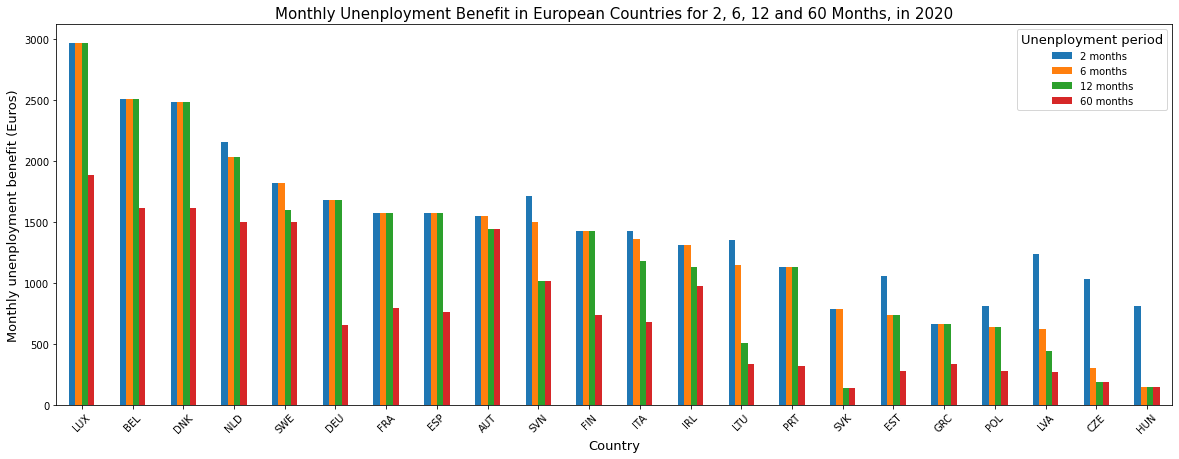

In [33]:
df2020.plot(x="Country", kind="bar", figsize=(20,7))
plt.title("Monthly Unenployment Benefit in European Countries for 2, 6, 12 and 60 Months, in 2020", fontsize=15)
plt.xticks(rotation = 45)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Monthly unenployment benefit (Euros)", fontsize=13)
legend = plt.legend()
legend.set_title("Unenployment period", prop = {'size':13})

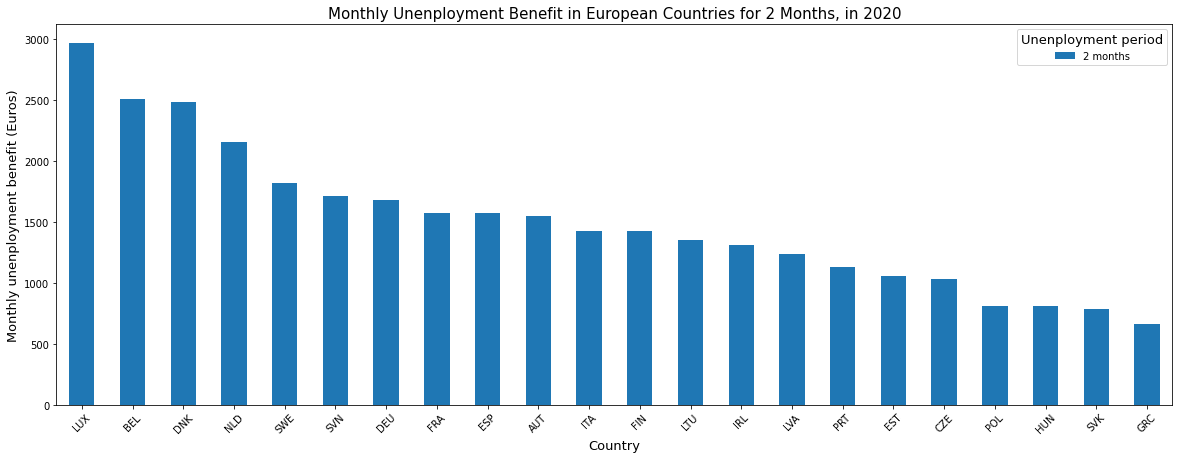

In [34]:
df2020.sort_values('2 months', ascending=False).plot(x="Country", y="2 months", kind="bar", figsize=(20,7))
plt.title("Monthly Unenployment Benefit in European Countries for 2 Months, in 2020", fontsize=15)
plt.xticks(rotation = 45)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Monthly unenployment benefit (Euros)", fontsize=13)
legend = plt.legend()
legend.set_title("Unenployment period", prop = {'size':13})

In [35]:
df_merged.head()

,Country,UnDuration,PerCentSingle,Year,AverWage$,AverWageSingle$,AverWageSingle€,MonUnBen€
0,AUT,1YEAR,51,2017,53136.352960,35601.356483,33821.288659,1437.404768
1,AUT,1YEAR,51,2018,53325.486022,35728.075635,33941.671853,1442.521054
2,AUT,1YEAR,51,2019,53690.031378,35972.321024,34173.704972,1452.382461
3,AUT,1YEAR,51,2020,53131.847260,35598.337664,33818.420781,1437.282883
4,AUT,2MTH,55,2017,53136.352960,35601.356483,33821.288659,1550.142397


## Αξιοποιήστε τα data sets που υπάρχουν στον ιστοχώρο  https://data.oecd.org/ . Συγκεκριμένα, χρησιμοποιήστε (όπως πχ είδατε παραπάνω) δύο dataframes από  διαφορετικά data sets, τα οποία έχουν ένα κοινό χαρακτηριστικό (key), κάντε ένα κατάλληλο merge και απαντήστε πιο σύνθετες ερωτήσεις κάνοντας τα αντίστοιχα διαγράμματα.

DATA:

Health spending: https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/health-spending.csv

Population: https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/population.csv

Road deaths per million: https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/road-deaths-per-m.csv

In [36]:
hlthspnd = pd.read_csv("https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/health-spending.csv")
hlthspnd

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,BEL,HEALTHEXP,OOPEXP,USD_CAP,A,2017,914.340,NaN
1,BEL,HEALTHEXP,OOPEXP,USD_CAP,A,2018,977.156,NaN
2,BEL,HEALTHEXP,OOPEXP,USD_CAP,A,2019,991.835,NaN
3,CZE,HEALTHEXP,OOPEXP,USD_CAP,A,2017,425.511,NaN
4,CZE,HEALTHEXP,OOPEXP,USD_CAP,A,2018,450.464,NaN
...,...,...,...,...,...,...,...,...
373,ROU,HEALTHEXP,COMPULSORY,USD_CAP,A,2018,1326.964,NaN
374,ROU,HEALTHEXP,COMPULSORY,USD_CAP,A,2019,1524.456,NaN
375,ROU,HEALTHEXP,VOLUNTARY,USD_CAP,A,2017,301.830,NaN
376,ROU,HEALTHEXP,VOLUNTARY,USD_CAP,A,2018,337.332,NaN


In [37]:
pop = pd.read_csv("https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/population.csv")
pop

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,POP,TOT,MLN_PER,A,2017,8.795073,NaN
1,AUT,POP,TOT,MLN_PER,A,2018,8.837707,NaN
2,AUT,POP,TOT,MLN_PER,A,2019,8.877637,NaN
3,AUT,POP,TOT,MLN_PER,A,2020,8.916845,NaN
4,BEL,POP,TOT,MLN_PER,A,2017,11.349081,NaN
...,...,...,...,...,...,...,...,...
103,MLT,POP,TOT,MLN_PER,A,2020,0.520193,NaN
104,ROU,POP,TOT,MLN_PER,A,2017,19.592933,NaN
105,ROU,POP,TOT,MLN_PER,A,2018,19.476713,NaN
106,ROU,POP,TOT,MLN_PER,A,2019,19.375835,NaN


In [38]:
rddths = pd.read_csv("https://raw.githubusercontent.com/tsparaskevas/ML_EDDE2/main/Homework%20MergeApply/road-deaths-per-m.csv")
rddths

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,LUX,ROADACCID,DEATH,1000000HAB,A,2017,58.691744,NaN
1,LUX,ROADACCID,DEATH,1000000HAB,A,2018,59.215396,NaN
2,LTU,ROADACCID,DEATH,1000000HAB,A,2017,67.529274,NaN
3,LTU,ROADACCID,DEATH,1000000HAB,A,2018,61.751685,NaN
4,LTU,ROADACCID,DEATH,1000000HAB,A,2019,66.567960,NaN
...,...,...,...,...,...,...,...,...
89,ESP,ROADACCID,DEATH,1000000HAB,A,2019,37.234647,NaN
90,NLD,ROADACCID,DEATH,1000000HAB,A,2017,35.782465,NaN
91,NLD,ROADACCID,DEATH,1000000HAB,A,2018,39.346262,NaN
92,NLD,ROADACCID,DEATH,1000000HAB,A,2019,38.109242,NaN


Τα 3 csv έχουν κοινή στήλη το location.

Το csv για τις δαπάνες της υγείας έχουν data για 3 χρονιές (2017, 2018, 2019), ενώ τα άλλα 2 csv έχουν data για 4 χρονιές (2017 - 2020).

Μάλλον δεν είναι όλες οι χώρες και στα 3 csv.

In [39]:
# Δημιουργία νέου df για τον πληθυσμό, με μόνο τις γραμμές του 2019 και μόνο τις στήλες LOCATION (χώρα) και Value (πληθυσμός σε εκατομμύρια)
# και μετονομασία του LOCATION σε Country και του Value σε MilPop
df_pop = pop[pop['TIME'] == 2019].filter(['LOCATION','Value'], axis=1).reset_index(drop=True).rename(columns={'LOCATION':'Country', 'Value':'MilPop'})
df_pop

,Country,MilPop
0,AUT,8.877637
1,BEL,11.462023
2,CZE,10.669324
3,DNK,5.814461
4,FIN,5.521605
5,FRA,67.215667
6,DEU,83.092958
7,GRC,10.721584
8,HUN,9.771142
9,IRL,4.921496


In [40]:
hlthspnd[(hlthspnd['TIME'] == 2019) & (hlthspnd['LOCATION'] == "GRC")]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
22,GRC,HEALTHEXP,OOPEXP,USD_CAP,A,2019,815.742,NaN
96,GRC,HEALTHEXP,TOT,USD_CAP,A,2019,2318.964,NaN
237,GRC,HEALTHEXP,COMPULSORY,USD_CAP,A,2019,1385.758,NaN
240,GRC,HEALTHEXP,VOLUNTARY,USD_CAP,A,2019,930.010,NaN


In [41]:
# Δημιουργία νέου df για τις δαπάνες για την υγεία, με μόνο τις γραμμές του 2019 και του ΤOT στο SUBJECT (σύνολο των δαπανών, κρατικών και ιδιωτικών)
# και μόνο με τις στήλες LOCATION (χώρα) και Value (δαπάνες υγείας σε εκατομμύρια)
# και μετονομασία του Value σε HealthSpendPerCap
df_hs = hlthspnd[(hlthspnd['TIME'] == 2019) & (hlthspnd['SUBJECT'] == "TOT")].filter(['LOCATION','Value'], axis=1).reset_index(drop=True).rename(columns = {'LOCATION':'Country', 'Value':'HealthSpendPerCap'})
df_hs

,Country,HealthSpendPerCap
0,AUT,5705.102
1,BEL,5458.401
2,CZE,3417.487
3,DNK,5477.567
4,FIN,4558.538
5,FRA,5274.260
6,DEU,6518.004
7,GRC,2318.964
8,HUN,2169.772
9,IRL,5083.213


Παρατηρώ ότι είναι μια χώρα λιγότερη

In [42]:
rddths[rddths['TIME'] == 2019]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4,LTU,ROADACCID,DEATH,1000000HAB,A,2019,66.567960,NaN
8,LVA,ROADACCID,DEATH,1000000HAB,A,2019,70.539475,NaN
12,ITA,ROADACCID,DEATH,1000000HAB,A,2019,53.123201,NaN
16,FRA,ROADACCID,DEATH,1000000HAB,A,2019,48.238689,NaN
20,POL,ROADACCID,DEATH,1000000HAB,A,2019,76.622247,NaN
24,HRV,ROADACCID,DEATH,1000000HAB,A,2019,73.058184,NaN
28,SWE,ROADACCID,DEATH,1000000HAB,A,2019,21.500382,NaN
33,SVN,ROADACCID,DEATH,1000000HAB,A,2019,48.841569,NaN
37,FIN,ROADACCID,DEATH,1000000HAB,A,2019,38.213520,NaN
41,IRL,ROADACCID,DEATH,1000000HAB,A,2019,28.372589,P


In [43]:
# Δημιουργία νέου df για τους οδικούς θανάτους, με μόνο τις γραμμές του 2019 και μόνο με τις στήλες LOCATION (χώρα) και Value (θάνατοι ανά εκατομμύριο)
# και μετονομασία του Value σε DeathsPerMillion
df_rd = rddths[rddths['TIME'] == 2019].filter(['LOCATION','Value'], axis=1).reset_index(drop=True).rename(columns = {'LOCATION':'Country', 'Value':'DeathsPerMillion'})
df_rd

,Country,DeathsPerMillion
0,LTU,66.567960
1,LVA,70.539475
2,ITA,53.123201
3,FRA,48.238689
4,POL,76.622247
5,HRV,73.058184
6,SWE,21.500382
7,SVN,48.841569
8,FIN,38.213520
9,IRL,28.372589


Παρατηρώ ότι εδώ λείπουν 3 χώρες

Θέλω να συγκρίνω τους οδικούς θανάτους με τις δαπάνες για την υγεία. Θα συνενώσω τα 3 df με κλειδί το Country.

In [44]:
from functools import reduce
data_frames = [df_rd, df_hs, df_pop]
df_health = reduce(lambda left,right: pd.merge(left,right,on=['Country'], how='outer'), data_frames).fillna(0)
df_health

,Country,DeathsPerMillion,HealthSpendPerCap,MilPop
0,LTU,66.567960,2727.189,2.794135
1,LVA,70.539475,2039.219,1.913826
2,ITA,53.123201,3653.401,59.729077
3,FRA,48.238689,5274.260,67.215667
4,POL,76.622247,2289.309,38.386476
5,HRV,73.058184,2014.205,4.065253
6,SWE,21.500382,5551.937,10.278888
7,SVN,48.841569,3303.471,2.089310
8,FIN,38.213520,4558.538,5.521605
9,IRL,28.372589,5083.213,4.921496


Για να συγκρίνω τους θανάτους με τις δαπάνες για την υγεία, θα κάνω και τις δαπάνες ανά εκατομμύριο πληθυσμού.

In [45]:
df_health.dtypes

Country               object
DeathsPerMillion     float64
HealthSpendPerCap    float64
MilPop               float64
dtype: object

In [46]:
df_health[['DeathsPerMillion', 'HealthSpendPerCap']]= df_health[['DeathsPerMillion', 'HealthSpendPerCap']].apply(pd.to_numeric)
df_health

,Country,DeathsPerMillion,HealthSpendPerCap,MilPop
0,LTU,66.567960,2727.189,2.794135
1,LVA,70.539475,2039.219,1.913826
2,ITA,53.123201,3653.401,59.729077
3,FRA,48.238689,5274.260,67.215667
4,POL,76.622247,2289.309,38.386476
5,HRV,73.058184,2014.205,4.065253
6,SWE,21.500382,5551.937,10.278888
7,SVN,48.841569,3303.471,2.089310
8,FIN,38.213520,4558.538,5.521605
9,IRL,28.372589,5083.213,4.921496


In [48]:
def hspm(row):
  health_spend_per_million = row['HealthSpendPerCap'] * row['MilPop']
  return health_spend_per_million

df_health['HealthSpendPerMillion'] = df_health.apply(hspm, axis=1)
df_health

,Country,DeathsPerMillion,HealthSpendPerCap,MilPop,HealthSpendPerMillion
0,LTU,66.567960,2727.189,2.794135,7620.134237
1,LVA,70.539475,2039.219,1.913826,3902.710342
2,ITA,53.123201,3653.401,59.729077,218214.269641
3,FRA,48.238689,5274.260,67.215667,354512.903831
4,POL,76.622247,2289.309,38.386476,87878.504985
5,HRV,73.058184,2014.205,4.065253,8188.252919
6,SWE,21.500382,5551.937,10.278888,57067.738606
7,SVN,48.841569,3303.471,2.089310,6901.974995
8,FIN,38.213520,4558.538,5.521605,25170.446213
9,IRL,28.372589,5083.213,4.921496,25017.012447


In [49]:
#df_health.plot(x="Country", y=["DeathsPerMillion", "HealthSpendPerMillion"])

In [50]:
#df_health = 
df_health.sort_values('DeathsPerMillion', ascending=False)

,Country,DeathsPerMillion,HealthSpendPerCap,MilPop,HealthSpendPerMillion
19,ROU,96.223099,1895.017,19.375835,36717.536714
11,BGR,90.026020,1842.048,6.975760,12849.685678
4,POL,76.622247,2289.309,38.386476,87878.504985
5,HRV,73.058184,2014.205,4.065253,8188.252919
1,LVA,70.539475,2039.219,1.913826,3902.710342
0,LTU,66.567960,2727.189,2.794135,7620.134237
20,GRC,64.169635,2318.964,10.721584,24862.967319
13,HUN,61.610000,2169.772,9.771142,21201.150320
18,PRT,60.857865,3347.429,10.286263,34432.535068
21,CZE,57.909251,3417.487,10.669324,36462.276069


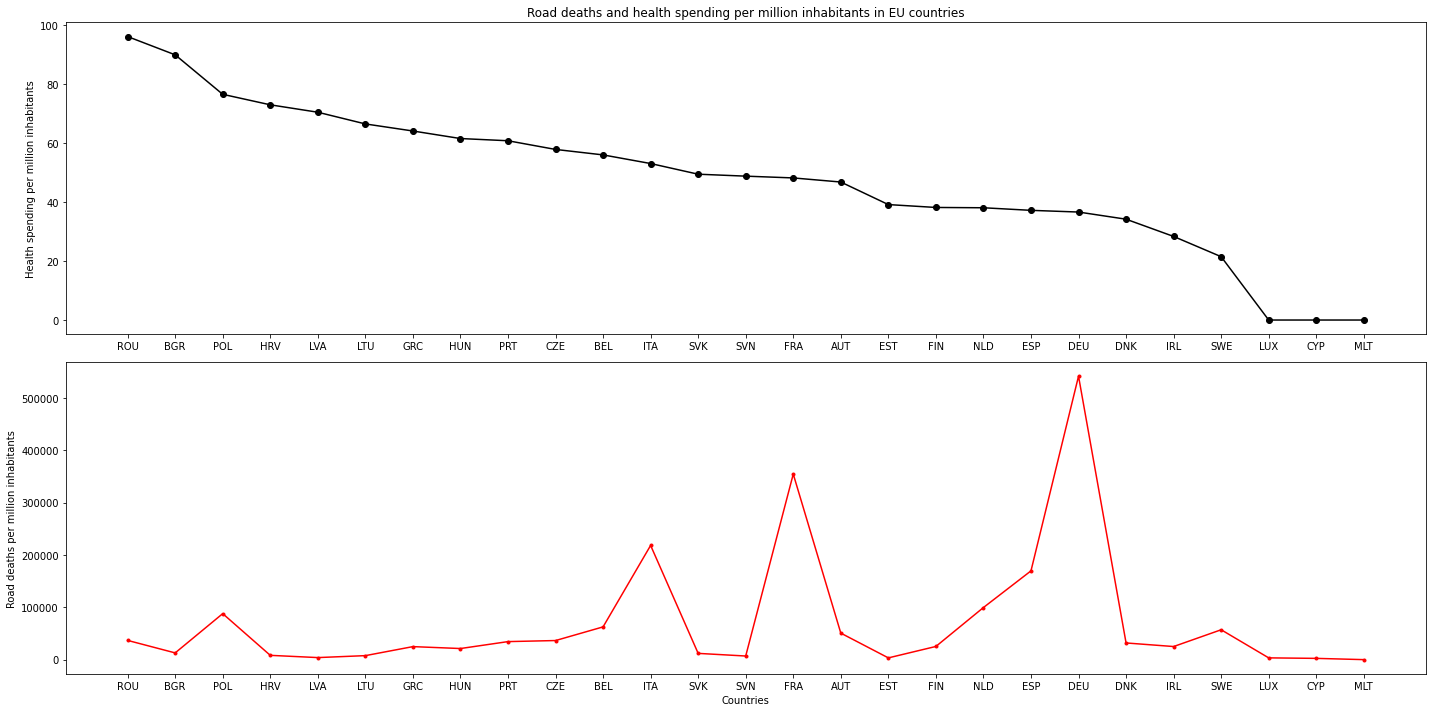

In [54]:
df_health = df_health.sort_values('DeathsPerMillion', ascending=False)
x = df_health['Country']
y1 = df_health['DeathsPerMillion']
y2 = df_health['HealthSpendPerMillion']

plt.rcParams["figure.figsize"] = (20, 10)

plt.subplot(2, 1, 1)
plt.plot(x, y1, 'ko-')
plt.title('Road deaths and health spending per million inhabitants in EU countries')
plt.ylabel('Health spending per million inhabitants')


plt.subplot(2, 1, 2)
plt.plot(x, y2, 'r.-')
plt.xlabel('Countries')
plt.ylabel('Road deaths per million inhabitants')

plt.tight_layout()

plt.show()